In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from glob import glob

In [27]:
from PIL import Image
import os

In [5]:
#import scipy.misc as sc
#from sklearn.feature_extraction import image

# Patching for One Image at a time

In [49]:
im = Image.open("../dataset_A/original/positive_images/20171005091805.jpg")

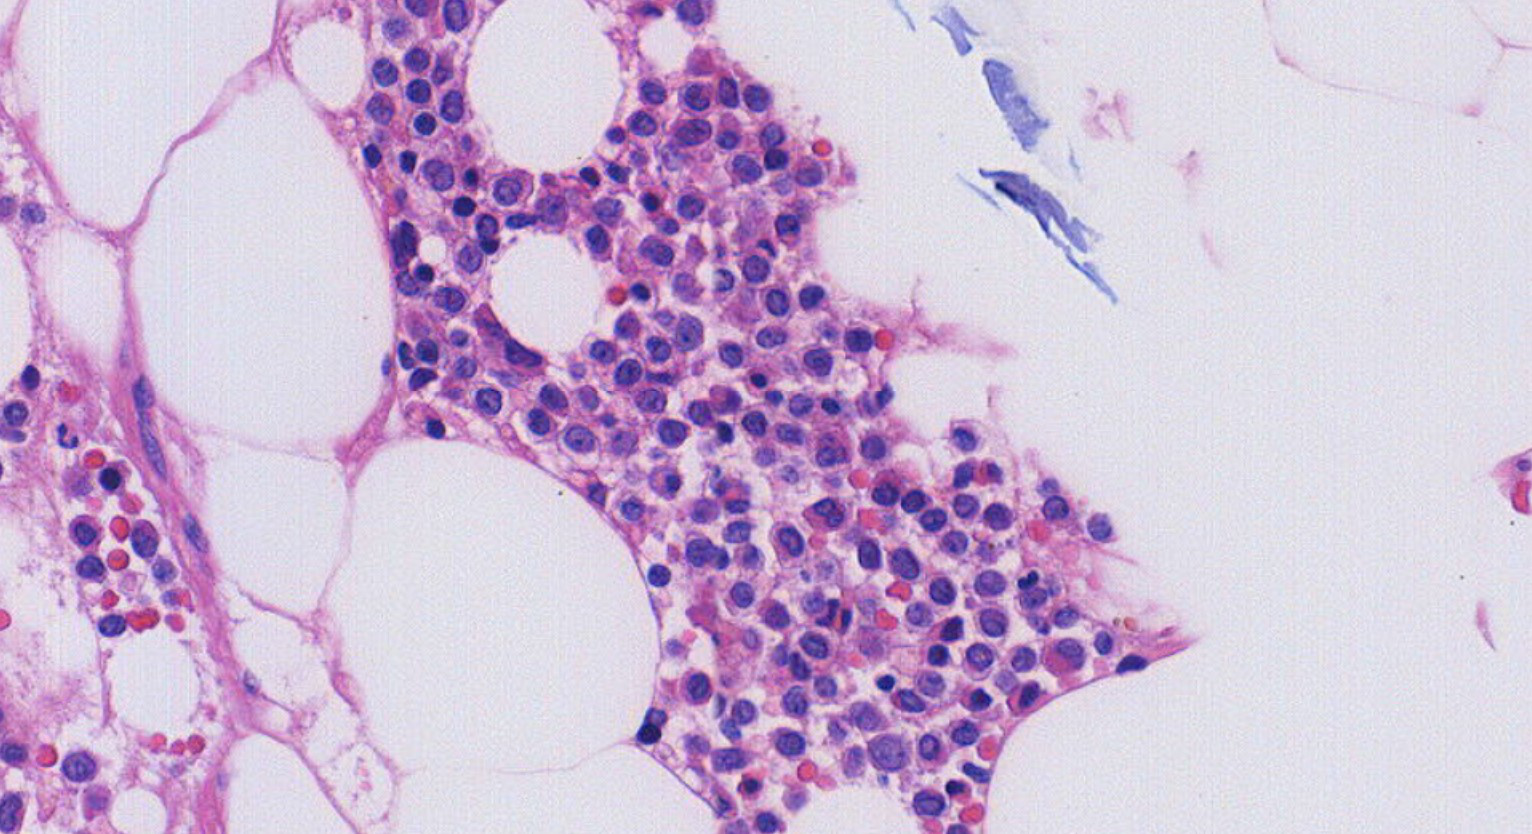

In [50]:
im

In [8]:
imgwidth, imgheight = im.size
imgwidth, imgheight, im.size

(1532, 834, (1532, 834))

# Code for Training With Data Augmentation

In [51]:
n_patch_div_2 = 5
height = np.int_(np.round_(((imgwidth * imgheight)**0.5)/n_patch_div_2, 0))
width = np.int_(np.round_(((imgwidth * imgheight)**0.5)/n_patch_div_2, 0))
path = "../Images/"

# Data Manipulation for Train Dataset

In [102]:
# /GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/dataset_A/original/positive_images/
Train_Data = []
data_dir = "../dataset_A/original/positive_images/"
files = glob(os.path.join(data_dir, '*.jpg'))

for myFile in files:
    im = Image.open(myFile)
    for i in range(0,imgheight,height):
        for j in range (0, imgwidth, width):
            #print (i, j, i+height, j+width) # Check Step
            a = im.convert('RGBA')
            box = (j, i, j+width, i+height)
            a = a.crop(box)
            #fff = Image.new('RGBA', a.size, (255,)*4) This will change the black backgroung for a white one
            #a = a.composite(a, fff, a)
            if a.convert("L").getextrema() not in ((0,0), (255,255)):
                #a.save(os.path.join(path,"IMG-NT-Rotate" + str(k) + ": " + str(i)+"-"+str(j)+"-"+str(i+height)+"-"+str(j+width)+".PNG"))
                Train_Data.append (np.array(a))
                #Train_Data.append (a)
                b = a.transpose(Image.FLIP_LEFT_RIGHT)
                b = b.transpose(Image.FLIP_TOP_BOTTOM)
                #b.save(os.path.join(path,"IMG-T-Rotate" + str(k) + ": " + str(i)+"-"+str(j)+"-"+str(i+height)+"-"+str(j+width)+".PNG"))
                Train_Data.append (np.array(b))
                #Train_Data.append (b)

3

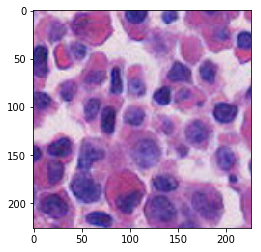

In [117]:
plt.imshow(Train_Data[1350])
len(Train_Data[1114].shape)
# y = Train_Data[4].reshape(Train_Data[4].shape + (1,)) to convert to 4 dimensions

In [113]:
# img_array = np.load(filename + '.npy')

In [ ]:
def get_batch(image_files, width, height, mode='RGBA'):
    """
    Get a single image
    """
    data_batch = np.array(
        [get_image(sample_file, width, height, mode) for sample_file in image_files]).astype(np.float32)

    # Make sure the images are in 4 dimensions
    if len(data_batch.shape) < 4:
        data_batch = data_batch.reshape(data_batch.shape + (1,))

    return data_batch